In [3]:
import pandas as pd

train_df = pd.read_csv('./input/dataset/train.csv')
del train_df['ID']
train_df.head()

,text,label
0,유소영비호감 성형아줌마,1
1,나오지마라 썅,3
2,식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러~~!!!,6
3,성희롱 당할 얼굴이 아닌데?ㅋㅋㅋ,5
4,"""끝까지 해보자~쪽파리 원숭이 자한 쓰레기당""",0


In [7]:
print(train_df.label.value_counts())

6    24900
3     8895
2     8481
0     8463
1     7107
4     4118
5     3899
Name: label, dtype: int64


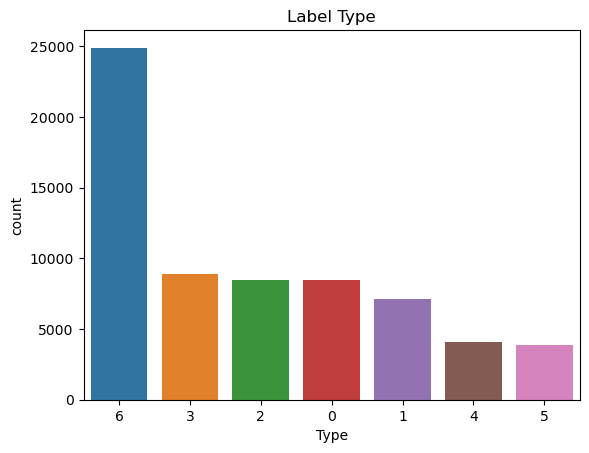

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
  x='label',
  data=train_df,
  order=train_df.label.value_counts().index
)

plt.xlabel("Type")
plt.title("Label Type");

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

normal_speech = train_df[train_df.label == 6]
negative_speech = train_df[train_df.label != 6]

print(normal_speech.shape, negative_speech.shape)

(24900, 2) (40963, 2)


In [25]:
normal_speech_text = " ".join(normal_speech.text.to_numpy().tolist())
negative_speech_text = " ".join(negative_speech.text.to_numpy().tolist())

In [28]:
print(normal_speech_text[:10])
print(negative_speech_text[:10])

with open('./input/normal_speech_text.txt', 'w', encoding='utf-8') as file:
    file.write(normal_speech_text)

with open('./input/negative_speech_text.txt', 'w', encoding='utf-8') as file:
    file.write(negative_speech_text)

식상하고 지긋지긋했
유소영비호감 성형아


In [33]:
# 한국어 전용 패키지
from konlpy.tag import Okt
from collections import Counter

with open('./input/normal_speech_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
normal_nouns = okt.nouns(text) # 명사만 추출
normal_words = [n for n in normal_nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
normal_word_cnt_dict = Counter(normal_words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [34]:
with open('./input/negative_speech_text.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
negative_nouns = okt.nouns(text) # 명사만 추출
negative_words = [n for n in negative_nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
negative_word_cnt_dict = Counter(negative_words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

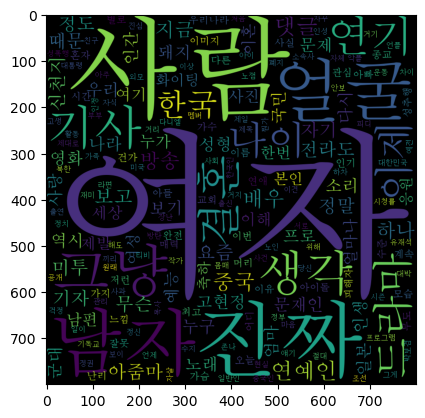

In [35]:
# 한글로 워드클라우드 시각화 

wc = WordCloud(font_path='C:/Windows/Fonts/batang.ttc', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(normal_word_cnt_dict)
plt.figure()
plt.imshow(gen)

wc.to_file('./output/normal_cloud.png')

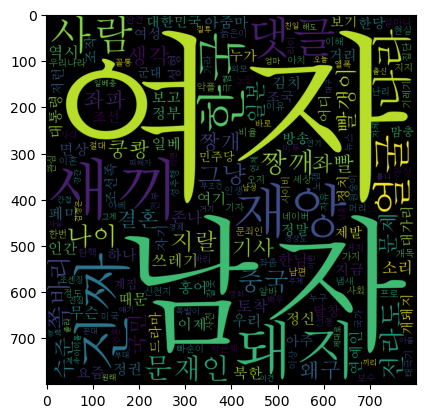

In [36]:
# 한글로 워드클라우드 시각화 
wc = WordCloud(font_path='C:/Windows/Fonts/batang.ttc', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(negative_word_cnt_dict)
plt.figure()
plt.imshow(gen)

wc.to_file('./output/negative_cloud.png')

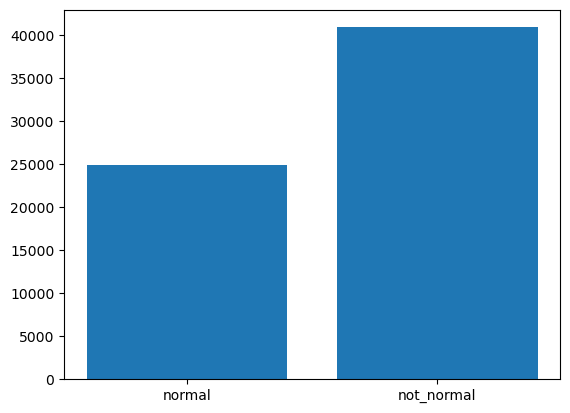

In [38]:
# 문장기반 학습 (?) Attention 대충 구상중..
count_6 = (train_df['label'] == 6).sum()

# label이 6이 아닌 항목 개수 계산
count_not_6 = (train_df['label'] != 6).sum()

# 시각화
plt.bar(['normal', 'not_normal'], [count_6, count_not_6])
plt.show()